

---

**Importing Required Libraries and Mounting Google Drive for Image Processing**

In [4]:
from google.colab import drive
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the images folder
images_folder_path = '/content/drive/My Drive/Images'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Counting the Number of Images in the Folder
python**

In [5]:
# Count images in the folder
image_files = os.listdir(images_folder_path)
print(f"Total images: {len(image_files)}")


Total images: 1560


**Displaying Sample Images from the Folder for Overview**

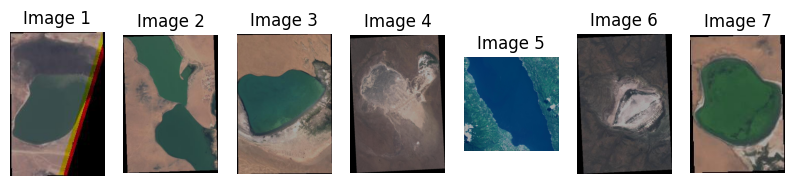

In [7]:
# Display a few sample images to get an overview
num_samples = 7 # Show three samples

plt.figure(figsize=(10, 10))
for i in range(num_samples):
    # Load image
    img = cv2.imread(os.path.join(images_folder_path, image_files[i]))

    # Convert BGR image to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display image
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(img_rgb)
    plt.title(f"Image {i+1}")
    plt.axis('off')

plt.show()


**Generating and Visualizing Water Mask for Water Body Detection**

In [19]:
def generate_water_mask(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Convert to RGB (OpenCV loads images in BGR format)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Convert to HSV color space for better color segmentation
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define the range for water color in HSV space (you can adjust these values)
    lower_blue = np.array([100, 50, 50])  # Lower bound of blue color
    upper_blue = np.array([140, 255, 255])  # Upper bound of blue color

    # Create a mask based on the blue color range
    water_mask = cv2.inRange(hsv_img, lower_blue, upper_blue)

    # Perform bitwise AND to extract water regions from the image
    result = cv2.bitwise_and(img_rgb, img_rgb, mask=water_mask)

    # Display the original image, mask, and the result
    plt.figure(figsize=(15, 5))

    # Original Image
    plt.subplot(1, 3, 1)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')

    # Water Mask
    plt.subplot(1, 3, 2)
    plt.imshow(water_mask, cmap='gray')
    plt.title('Water Mask')
    plt.axis('off')

    # Resultant Image (Water Bodies Detected)
    plt.subplot(1, 3, 3)
    plt.imshow(result)
    plt.title('Detected Water Bodies')
    plt.axis('off')

    plt.show()

    return water_mask


**Processing Randomly Selected Images for Water Body Detection**

Processing image: water_body_2212.jpg


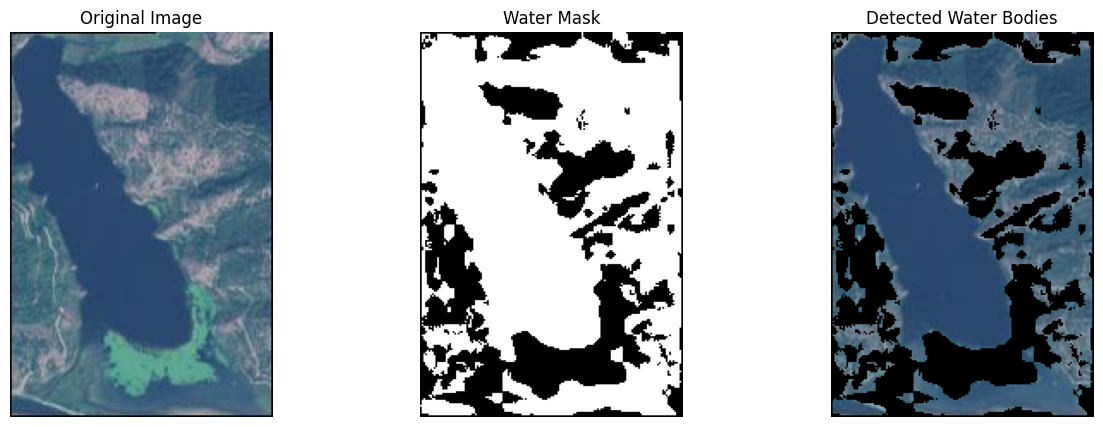

Processing image: water_body_69.jpg


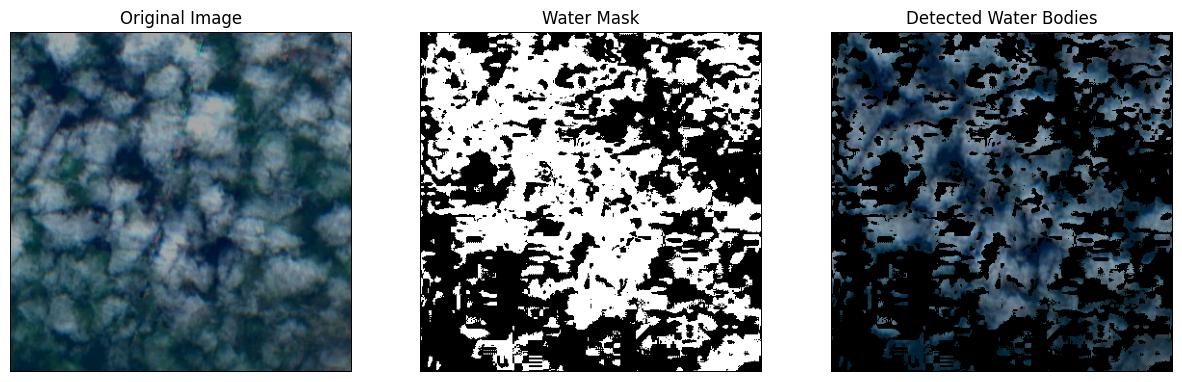

Processing image: water_body_1290.jpg


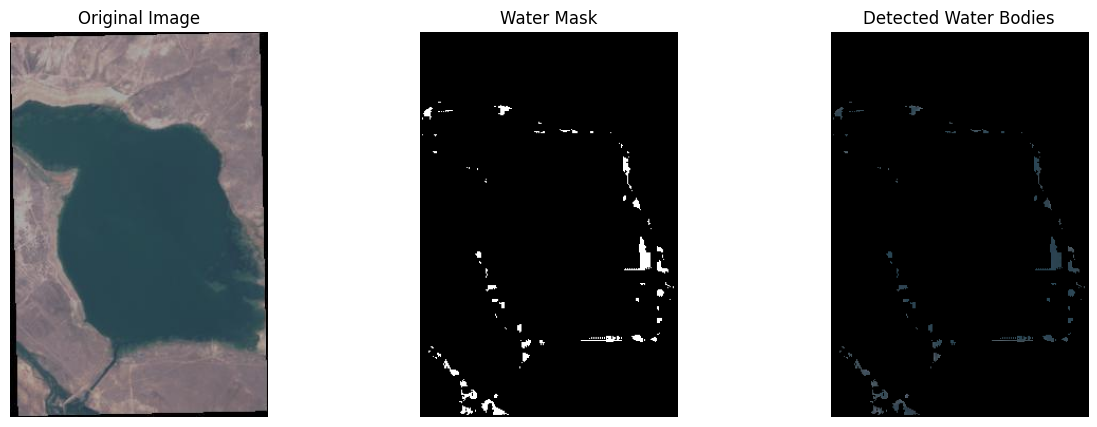

Processing image: water_body_2285.jpg


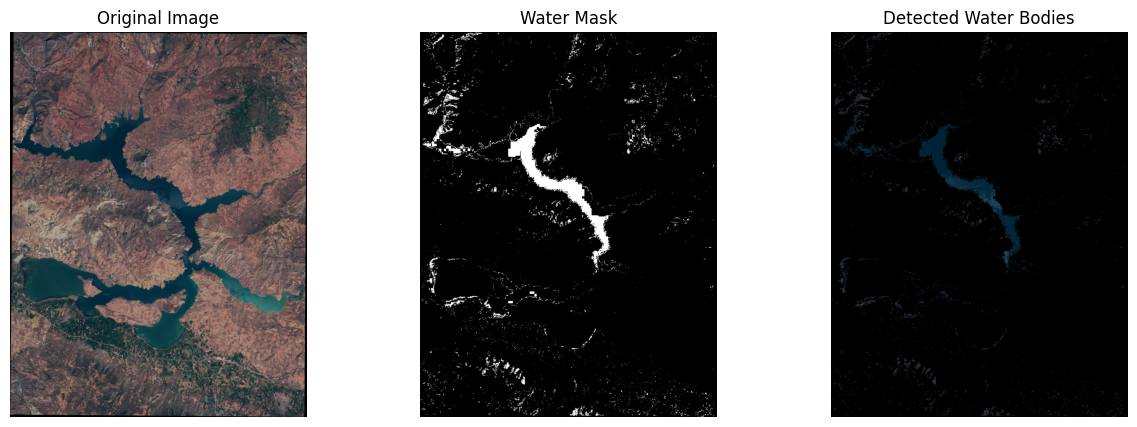

Processing image: water_body_1130.jpg


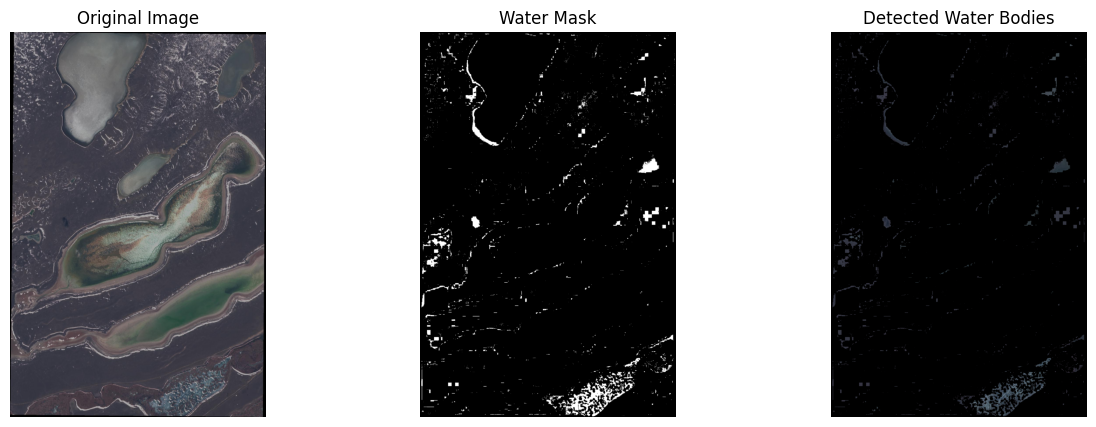

Processing image: water_body_7209.jpg


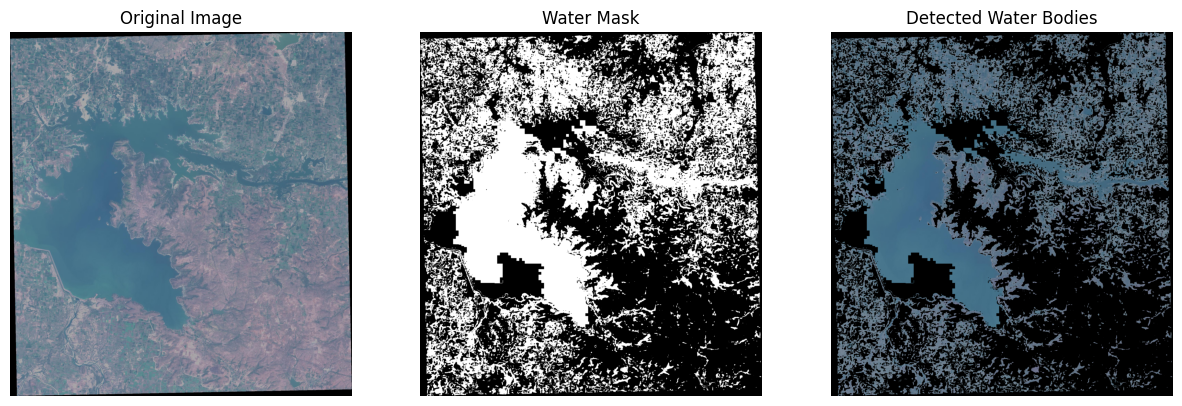

Processing image: water_body_7093.jpg


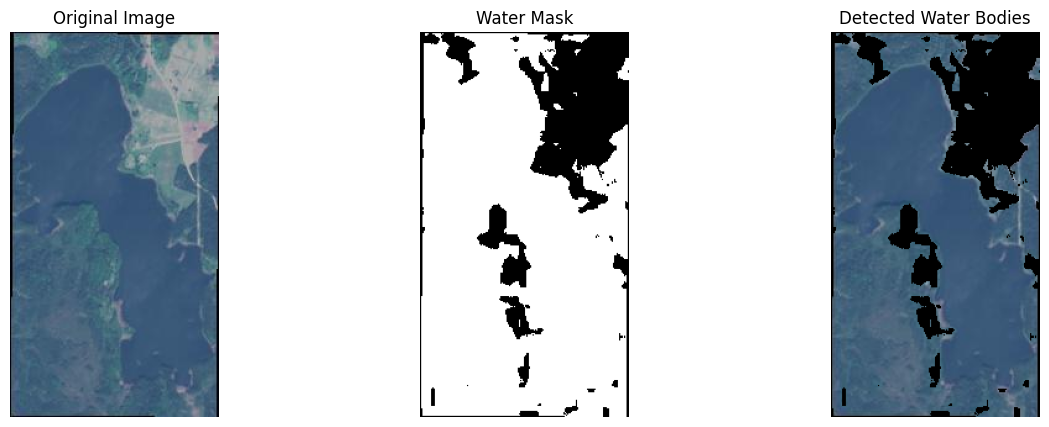

Processing image: water_body_1098.jpg


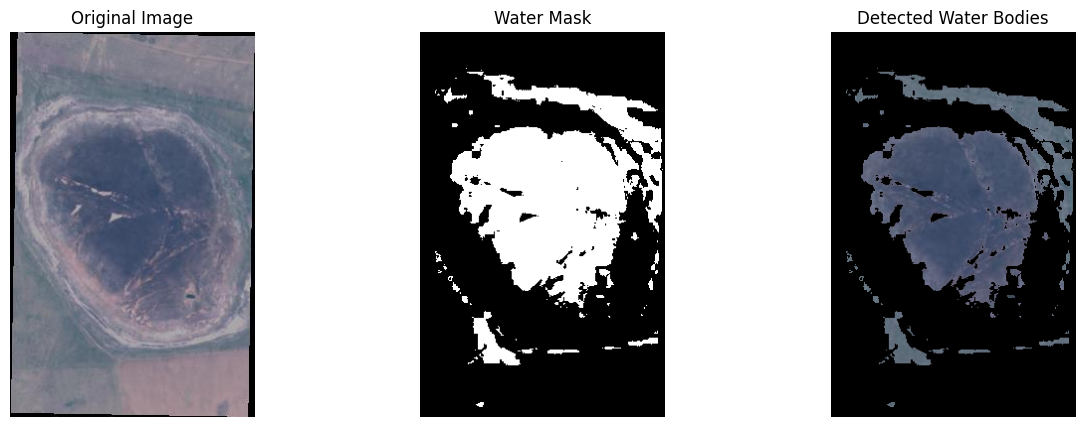

Processing image: water_body_611.jpg


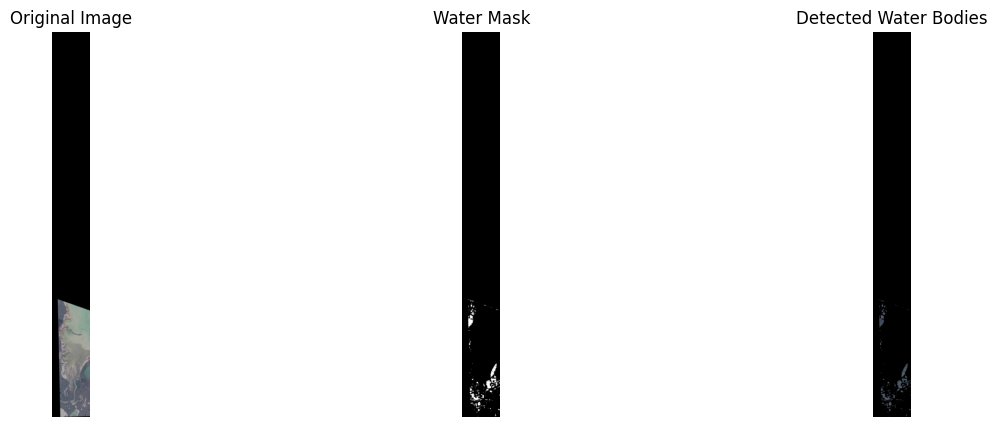

Processing image: water_body_1021.jpg


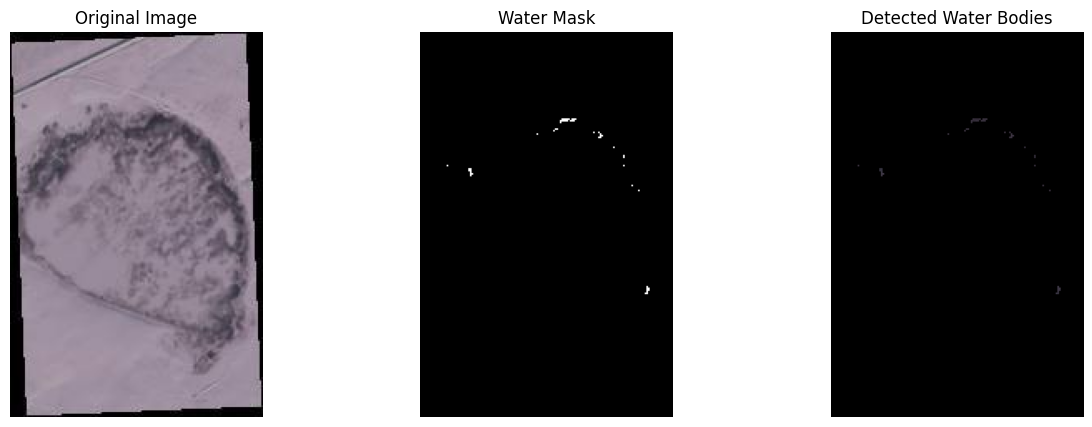

In [17]:
import random

# Get list of image files in the folder
image_files = os.listdir(images_folder_path)

# Randomly select 10 images from the folder (make sure there are at least 10 images)
selected_images = random.sample(image_files, 10)

# Loop through each selected image and apply water detection
for image_file in selected_images:
    image_path = os.path.join(images_folder_path, image_file)
    print(f"Processing image: {image_file}")

    # Generate water mask and display the results
    generate_water_mask(image_path)


**Generating and Plotting Histogram of Water Body Mask Intensities**

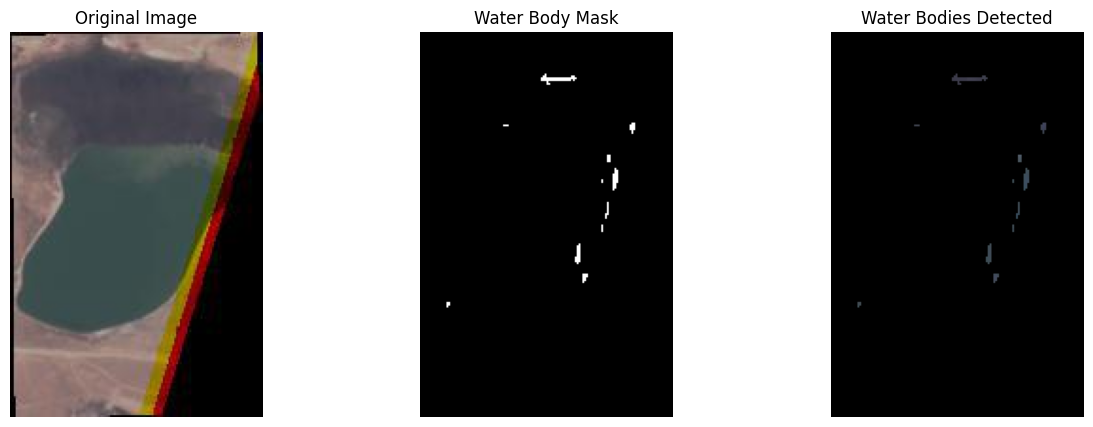

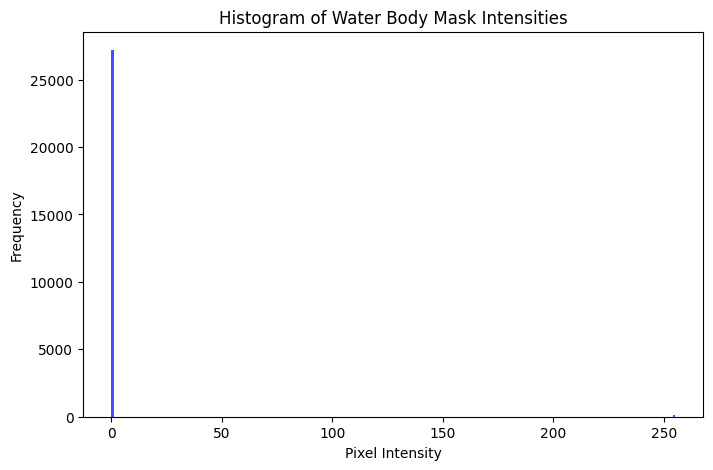

In [9]:
def plot_histogram(mask):
    # Plot histogram of mask intensities
    plt.figure(figsize=(8, 5))
    plt.hist(mask.ravel(), bins=256, color='blue', alpha=0.7)
    plt.title("Histogram of Water Body Mask Intensities")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

# Generate and plot histogram for the detected mask
mask = detect_water_bodies(os.path.join(images_folder_path, image_files[0]))
plot_histogram(mask)


In [12]:
from google.colab import drive
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the images folder
images_folder_path = '/content/drive/My Drive/Images'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading and Preprocessing Images for Water Body Detection, and Splitting Dataset**

In [25]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the images folder
images_folder_path = '/content/drive/My Drive/Images'

# Function to load and preprocess images
def load_and_preprocess_images(image_folder_path):
    image_files = os.listdir(image_folder_path)
    images = []
    labels = []  # For this example, we assume we have binary labels (water/no water)

    for image_file in image_files:
        image_path = os.path.join(image_folder_path, image_file)

        if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Read the image
            img = cv2.imread(image_path)
            if img is None:
                continue  # Skip invalid images

            # Resize image to fixed size (e.g., 128x128)
            img_resized = cv2.resize(img, (128, 128))

            # Normalize pixel values (0 to 1)
            img_normalized = img_resized.astype("float32") / 255.0

            # Add the image to the list
            images.append(img_normalized)

            # For simplicity, we assume labels:
            # If the image contains water (based on a simple heuristic or labeled dataset), set label to 1 (water), else 0 (no water).
            # (You may need actual labeled data or masks for training)
            label = 1 if 'water' in image_file.lower() else 0  # Example heuristic for labeling
            labels.append(label)

    # Convert to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    return images, labels

# Load and preprocess images
images, labels = load_and_preprocess_images(images_folder_path)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Training images: {len(X_train)}, Testing images: {len(X_test)}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Training images: 1248, Testing images: 312


**Building and Summarizing the CNN Model for Water Body Detection**

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define CNN model
def build_cnn_model(input_shape):
    model = Sequential()

    # Convolutional layer 1
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional layer 2
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional layer 3
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output
    model.add(Flatten())

    # Fully connected layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Dropout for regularization

    # Output layer (binary classification: water or no water)
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Define the input shape (128x128x3)
input_shape = (128, 128, 3)

# Build the model
cnn_model = build_cnn_model(input_shape)

# Summary of the model
cnn_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

**Training and Evaluating the CNN Model for Water Body Detection**

In [27]:
# Train the model
history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")


Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9365 - loss: 0.0812 - val_accuracy: 1.0000 - val_loss: 1.2595e-19
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 1.0000 - loss: 2.4328e-14 - val_accuracy: 1.0000 - val_loss: 5.9523e-21
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 1.0000 - loss: 6.6756e-16 - val_accuracy: 1.0000 - val_loss: 5.5516e-21
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 1.0000 - loss: 4.5292e-18 - val_accuracy: 1.0000 - val_loss: 5.5443e-21
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 1.0000 - loss: 5.3294e-12 - val_accuracy: 1.0000 - val_loss: 5.5438e-21
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 1.0000 - loss: 1.9334e-16 - val_accuracy: 1.0000 - val_loss: 5.5437e-21
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 1.0000 - loss: 4.4793e-17 - val_accuracy: 1.0000 - val_loss: 5.5437e-21
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 1.00

**Plotting Training and Validation Accuracy and Loss for Model Evaluation**

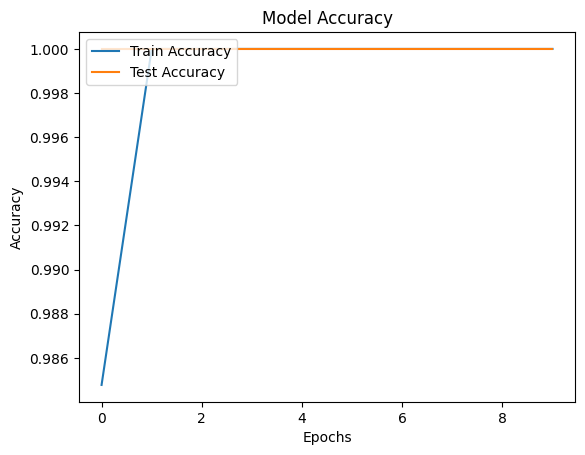

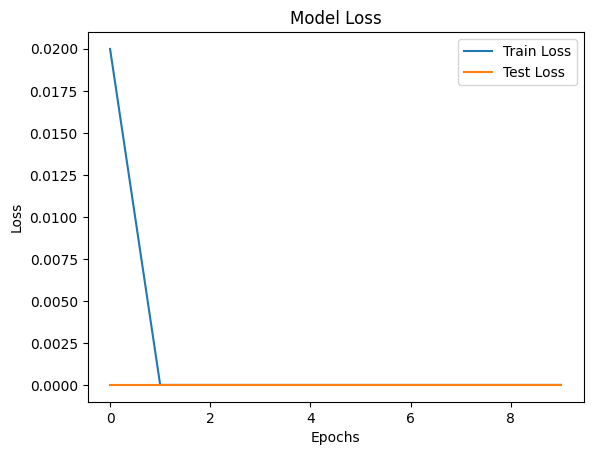

In [31]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()
